## Introduction to Scikit-Learn
This notebook demonstrates some of the most useful functions of scikit learn library.


In [36]:
## 0. An end to end Scikit Learn Workflow

our_wrkflow = [
'0. An end to end scikit-learn workflow',
'1. Getting the data ready',
'2. chose the right estimator/ algorithm for our problems',
'3. fit the model and use it to make predictions on our data',
'4. Evaluate the model',
'5. Improve the model',
'6. save and load a trained model'
'7. Putting it all together']


In [37]:
import numpy as np
import pandas as pd

In [1]:
# Get the data ready
import pandas as pd
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X (features matrix)
X = heart_disease.drop('target', axis = 1)

# Create y (labels)
y = heart_disease['target']

In [5]:
# 2 Choose the right model for your data
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3 Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [12]:
y_test

240    0
203    0
259    0
124    1
232    0
      ..
185    0
244    0
130    1
265    0
214    0
Name: target, Length: 61, dtype: int64

In [13]:
# Evaluate the model on the training data and test data.
clf.score(X_train, y_train)

1.0

In [14]:
clf.score(X_test, y_test)

0.7540983606557377

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        33
           1       0.68      0.89      0.77        28

    accuracy                           0.75        61
   macro avg       0.78      0.76      0.75        61
weighted avg       0.78      0.75      0.75        61



In [16]:
confusion_matrix(y_test, y_preds)

array([[21, 12],
       [ 3, 25]])

In [17]:
accuracy_score(y_test, y_preds)

0.7540983606557377

In [20]:
#5 Improve a model
# Try differenet number of estimators
np.random.seed(42)
for i in range(10, 100, 10):
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f'Trying the model with {i} estimators')
    print(f'Model Accuracy on test set: {clf.score(X_test, y_test) * 100:2f} %')
    print('')

Trying the model with 10 estimators
Model Accuracy on test set: 77.049180 %

Trying the model with 20 estimators
Model Accuracy on test set: 77.049180 %

Trying the model with 30 estimators
Model Accuracy on test set: 73.770492 %

Trying the model with 40 estimators
Model Accuracy on test set: 75.409836 %

Trying the model with 50 estimators
Model Accuracy on test set: 73.770492 %

Trying the model with 60 estimators
Model Accuracy on test set: 75.409836 %

Trying the model with 70 estimators
Model Accuracy on test set: 75.409836 %

Trying the model with 80 estimators
Model Accuracy on test set: 77.049180 %

Trying the model with 90 estimators
Model Accuracy on test set: 75.409836 %



In [24]:
# Save the model and load it
import pickle
pickle.dump(clf, open('random_forest_model.pk1', 'wb'))

In [35]:
import sklearn
sklearn.show_versions()


System:
    python: 3.10.13 (main, Sep 11 2023, 08:16:02) [Clang 14.0.6 ]
executable: /Users/ali/Desktop/ML/sample_project/env/bin/python
   machine: macOS-13.5-arm64-arm-64bit

Python dependencies:
      sklearn: 1.3.0
          pip: 23.3.1
   setuptools: 68.0.0
        numpy: 1.26.0
        scipy: 1.11.3
       Cython: None
       pandas: 2.1.1
   matplotlib: 3.8.0
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: /Users/ali/Desktop/ML/sample_project/env/lib/libopenblasp-r0.3.21.dylib
         prefix: libopenblas
       user_api: blas
   internal_api: openblas
        version: 0.3.21
    num_threads: 8
threading_layer: pthreads
   architecture: armv8

       filepath: /Users/ali/Desktop/ML/sample_project/env/lib/libomp.dylib
         prefix: libomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 8


## 1. Getting the data ready

Three main things we have to do:
1. Split the data into features and labels(usually 'X' & 'y')
2. Filling (also called computing) or disregarding missing values.
3. Converting non_numerical values into numerical values ; aka feautre encoding.

In [38]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
X = heart_disease.drop('target', axis = 1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [40]:
y = heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [43]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [45]:
X.shape

(303, 13)

In [46]:
len(heart_disease)

303

Its very important to have all the data in numerics because computers and thus our machine learning models only understand numbers.

# 1.1 make sure its all numerical

In [47]:
car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [49]:
len(car_sales)

1000

a bit tricky to realise that even our doors variable is categorical.

In [54]:
# Split your x and Y
X = car_sales.drop('Price', axis = 1)
y = car_sales['Price']

In [58]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [62]:
# Lets fit the model
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
model.score(X_test, y_test)

0.3235867221569877

Key takeaway is that to fit a regression model we must convert non-numeric vars into numeric

In [64]:
print(sklearn.__version__)

1.3.0


### 1.2 What if we had missing values

1. Fill them with some values (also known as imputation)
2. Remove the samples with missing data altogether

In [68]:
# Import missing car sales data
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')

In [69]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [71]:
# Lets isolate X and y
X = car_sales_missing.drop('Price', axis = 1)
X.head(0)
y = car_sales_missing['Price']

In [73]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Option 1 : Fill missing data with 'Pandas'

In [74]:
# Fill the 'Make' column
car_sales_missing['Make'].fillna('missing', inplace = True)

# Fill the colour column
car_sales_missing['Colour'].fillna('missing', inplace = True)

# Fill the odometer column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace = True)

# Fill the doors column
car_sales_missing['Doors'].fillna(4, inplace = True)

In [75]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [76]:
# For your y which is label and Price; its best to drop the rows altogether.
car_sales_missing.dropna(inplace = True)

In [77]:
len(car_sales_missing)

950

In [78]:
X = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing['Price']

In [80]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option2: Fill missing values with scikit learn.

In [81]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [82]:
# Drop the rows with no labels
car_sales_missing.dropna(subset = ['Price'], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [83]:
# Split into X and y
X = car_sales_missing.drop('Price', axis =1)
y = car_sales_missing['Price']

In [93]:
# Create train test split first as mentioned in slides
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [94]:
# Fill misiing values with Scikit_learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy = 'constant', fill_value = 'missing')
door_imputer = SimpleImputer(strategy = 'constant' , fill_value = 4)
num_imputer = SimpleImputer(strategy = 'mean')

#Define columns
cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer; something that fills missing data
imputer = ColumnTransformer([('cat_imputer', cat_imputer, cat_features), ('door_imputer', door_imputer, door_feature),
                             ('num_imputer', num_imputer, num_features)])

# Transform the data
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.fit_transform(X_test)
filled_X_train

array([['Toyota', 'Green', 4.0, 165225.0],
       ['Nissan', 'Red', 3.0, 143204.0],
       ['Nissan', 'Black', 4.0, 178899.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [95]:
# Now lets create a dataframe with no missing values
car_sales_filled_train = pd.DataFrame(filled_X_train, columns = ['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled_test = pd.DataFrame(filled_X_test, columns = ['Make', 'Colour', 'Doors', 'Odometer (KM)'])


In [96]:
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [97]:
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [98]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.fit_transform(car_sales_filled_test)
transformed_X_train

<712x15 sparse matrix of type '<class 'numpy.float64'>'
	with 2848 stored elements in Compressed Sparse Row format>

In [99]:
# Now we have our data as numbers and filled data
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.20683089338742

## 2. Choosing the right machine learning model/estimator / algorithm
Some things to note remember:
-> sklearn refers to machine learning models as estimators
-> Classification problem -> predicting a category -> heart problem or not.
-> Regression problem -> predicting sales or price of a car with certain features.

Always look for sklearn machine learning model selection map

# 2.1 Picking the right machine learning model for your data.
 Regression problem for california housing data

In [102]:
#Get california housing data set
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [103]:
housing_df = pd.DataFrame(housing['data'], columns = housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [105]:
housing_df['target'] = housing['target']
housing_df = housing_df.drop('MedHouseVal', axis = 1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [109]:
# Import algorithm/ estimator
from sklearn.linear_model import Ridge
# Set up random.seed
np.random.seed(42)

# Create the data
X = housing_df.drop(columns = 'target', axis = 1)
y = housing_df['target']

# Split the data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.5758549611440126

Now we try to improve the results by using a different model.
we use ensemble models -> specifically using Random forest -> which is a collection of many different trees.
n_estimators => number of decsion trees.

In [111]:
# Import the RandomForestRegressor model from sklearn ensemble module.
from sklearn.ensemble import RandomForestRegressor

# Set up random seed.
np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis = 1)
y = housing_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#fit the model.
model = RandomForestRegressor()
model.fit(X_train, y_train)

#check the score on the test.
model.score(X_test, y_test)

0.8059809073051385

Look how the score which is Rsquare improved from 57% to 80%.

# 2.2 Choosing an estimator for a classification problem
Always look at the map from sklearn

In [112]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [113]:
len(heart_disease)

303

Consulting the map from sklearn it says to use LinearSVC.

In [115]:
# Import the Linear SVC
from sklearn.svm import LinearSVC

#Setup the random seed
np.random.seed(42)

# Get the data ready
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate LinearSVC
clf = LinearSVC(dual = 'auto')
clf.fit(X_train, y_train)

#Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8688524590163934

In [117]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Now lets handle the same problem with RandomForestClassifier


In [118]:
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Setup the random seed
np.random.seed(42)

# Get the data ready
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

As we can see both the models yielded approx similary results.

A little tip in ML:
            if you have structured data use ensemble methods; it will perform well.
            if unstructured data use deep learning or transfer learning


# 3 Fit the model/ algorithm on our data and use it to make predictions
3.1 Fitting the model to the data

In [119]:
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Setup the random seed
np.random.seed(42)

# Get the data ready
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()

#Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

#Evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

In [120]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [121]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Very Imp to realise the model just tries to find patterns in the data; that what combination of features leads to particular values in
labels or target variables.

### 3.2 Make predictions using a machine learning model.

2 ways to make predictions:
    1. predict()
    2. predict_probab()

In [122]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [123]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [125]:
# Compare the predictions to truth labels to evaluate the model.
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [126]:
# look how this is similar to:
clf.score(X_test, y_test)

0.8524590163934426

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

### Make predictions with predict_proba()

In [128]:
# predict_proba() -> returns the probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [129]:
# Lets predict on the same data..
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

### We can also look at predictions with our regression problems.


In [130]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [134]:
#Lets create a regression model to have a look at predictions.
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Prepare X and Y
X = housing_df.drop('target', axis = 1)
y = housing_df['target']

# Create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate the model
model = RandomForestRegressor()

# Fit the model on training data.
model.fit(X_train, y_train)

y_preds = model.predict(X_test)
y_preds

array([0.49058  , 0.75989  , 4.9350165, ..., 4.8539888, 0.71491  ,
       1.66568  ])

In [137]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [136]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [140]:
# Compare actuals with the predictions
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3270458119670544

## 4. Evaluating a machine learning model

Three way to evaluate a ml model:

    1. Estimators/ model's built in score() method
    2. The `scoring` parameter
    3. Problem-specific metric functions

### 4.1 Evaluating a model with the score method

In [148]:
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Setup the random seed
np.random.seed(42)

# Get the data ready
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()

#Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)



RandomForestClassifier()

In [149]:
# The highest value for the score method is 1.0 and the lowest 0.0
clf.score(X_train, y_train)

1.0

In [150]:
# The default metric for classification problem is mean accuracy score.
clf.score(X_test, y_test)

0.8524590163934426

In [153]:
#Lets create a regression model to have a look at predictions.
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Prepare X and Y
X = housing_df.drop('target', axis = 1)
y = housing_df['target']

# Create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate the model
model = RandomForestRegressor(n_estimators = 100)

# Fit the model on training data.
model.fit(X_train, y_train)



RandomForestRegressor()

In [152]:
model.score(X_test, y_test) # with two estimators

0.6979664249351754

In [155]:
# The default score on regression models is R-squared. highest being 1.0 and lowest 0.0
model.score(X_test, y_test) # with 100 estimators

0.8059809073051385

## 4.2 Evaluating a model using the scoring parameter.

In [156]:
from sklearn.model_selection import cross_val_score
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Setup the random seed
np.random.seed(42)

# Get the data ready
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()

#Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)


RandomForestClassifier()

In [157]:
clf.score(X_test, y_test)

0.8524590163934426

In [158]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [159]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Takes the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# compare the two:
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

# Remember default scoring parameter of our classifier is mean accuracy score.
 if scoring_parameter is set to none / default ( which is none ) it uses the model's default scoring parameter which in case of classifier is mean accuracy score.


 remember very imp: cross validation ensures that our training is done on entire data to make better predictions

### 4.2.1 Classification model Evaluation metrics
    * 1. Accuracy
    * 2. Area under ROC curve
    * 3. Confusion Matrix
    * 4. Classification Report

    ** Accuracy

In [162]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop(columns = 'target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf, X, y)

In [173]:
average = np.mean(cross_val_score)

In [177]:
print(f'Heart Disease Classifier Cross-Validated Accuracy: {round(average * 100, 2)} %')

Heart Disease Classifier Cross-Validated Accuracy: 82.48 %


 ### ROC / AUC 

** Area under the reciever operating characteristic curve (ROC/ AUC)

ROC curves are a comparison of model's true positive rate (tpr) versus a models false positive rate (fpr).

* True Positive = models predicts 1 when truth is 1
* False Positive = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* False Negative = model predicts 0 when truth is 1

In [180]:
# Lets do our heart disease classification fitting again.
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf.fit(X_train, y_train)

#Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [181]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53, 0.74,
       0.3 , 0.89, 0.05, 0.97, 0.98, 0.99, 0.16, 0.05, 0.02, 0.49, 0.11,
       0.62, 0.71, 0.74, 0.66, 0.8 , 0.78, 0.17, 0.85, 0.06, 0.08, 0.04,
       0.38, 0.54, 0.11, 0.56, 0.84, 0.67, 0.92, 0.87, 0.83, 0.82, 0.62,
       0.68, 0.23, 0.61, 1.  , 0.17, 0.03, 0.15, 0.2 , 0.75, 0.75, 0.13,
       0.07, 0.29, 0.99, 0.13, 0.  , 0.14])

In [184]:
from sklearn.metrics import roc_curve

# calculate fpr, tpr, thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

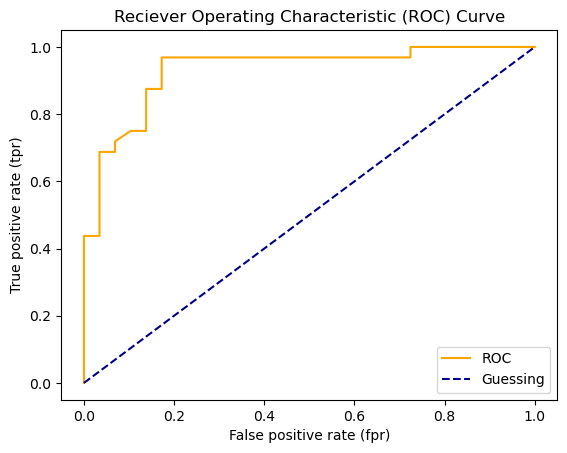

In [185]:
# Create a function for plotting ROC curves.
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a roc curve given false positive rate(fpr) and true positive rate(tpr)
    of a given model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    # Plot line with no predictive power (base line)
    plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')

    #Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Reciever Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show();

plot_roc_curve(fpr, tpr)

In [186]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

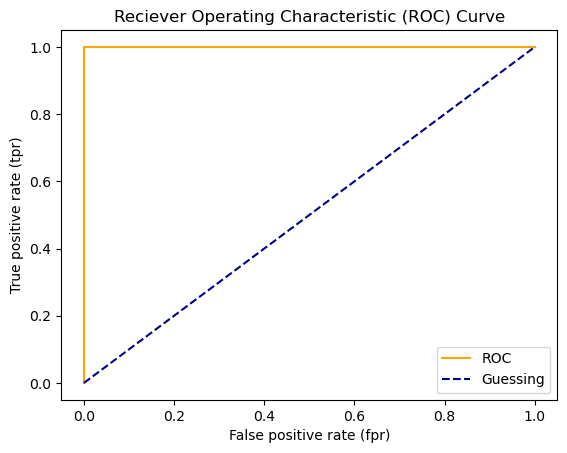

In [187]:
# Plot perfect ROC curve and AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [188]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

The next way to evaluate a classification model is using a confusion matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

In essence giving you an idea where the model is actually getting confused.

In [189]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [190]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=['Actual labels'], colnames = ['Predicted labels'])

Predicted labels,0,1
Actual labels,,
0,24,5
1,4,28


In [191]:
# Install a conda package into your current environment.
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/ali/Desktop/ML/sample_project/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.12.2             |  py310hca03da5_0         496 KB
    ------------------------------------------------------------
                                           Total:         496 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/osx-arm64::seaborn-0.12.2-py310hca03da5_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


<Axes: >

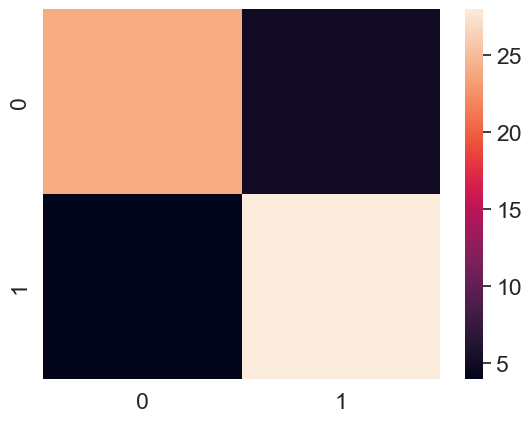

In [192]:
# Make our confusion matrix more visual using heatmap from seaborn
import seaborn as sns

# Set the font scale
sns.set(font_scale = 1.5)

#Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_matrix)

### Creating the confusion matrix from scikit learn.metrics
This is a newer method only available in scikit learn versions above 1.0

In [193]:
sklearn.__version__

'1.3.0'

In [194]:
from sklearn.metrics import ConfusionMatrixDisplay

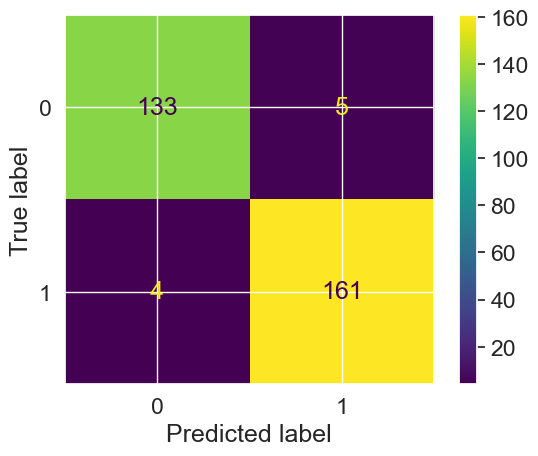

In [203]:
ConfusionMatrixDisplay.from_estimator(estimator= clf, X= X, y= y)


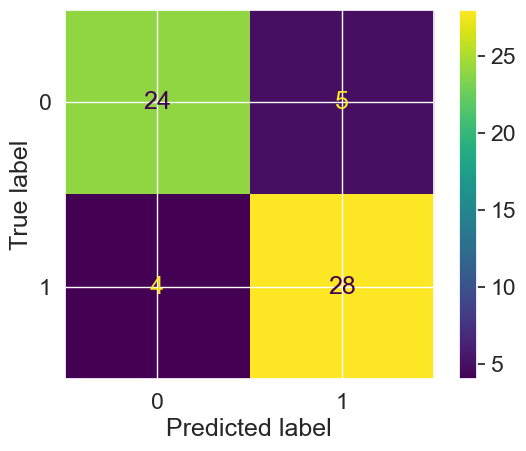

In [208]:
ConfusionMatrixDisplay.from_predictions(y_test,  y_preds);

### Classification Report

In [209]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### To summarize classification metrics:

* Accuracy is good measure to start with if all classes are balanced.
* Precision and recall become more important when classess are imbalanced.
* if false positive predictions are worse than false negatives aims for high precision.
* if false negative predictions are worse than false positives aim for high recall
* f1 score is a combiation of precision and recall.


### 4.2.2 Regression model evaluation metrics

The ones we're going to cover are:
1. R^2 -> coefficient of determination.
2. Mean Absolute error(MAE)
3. Mean Squared Error(MSE)

In [211]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [212]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# data setup
X = housing_df.drop(columns = 'target')
y = housing_df['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate the model:
model = RandomForestRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8059809073051385

Remember this is R^2; which tells how much proportion of our target variable is explained by independant vars.
* In other words how much variation in our y is explained by our model.
* It compares the predictions of our model to the mean of target vriable

In [214]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean. -> we do this to look how we get an R^2 score of 0.0
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:5]
r2_score(y_test, y_test_mean)

0.0

In [215]:
r2_score(y_test, y_test)

1.0

**Mean Absolute Error (MAE)**
MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your model's predictions are.

In [216]:
# MAE
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

0.3270458119670544

What this means is that on average our predicted values are +- 0.327 from the actual values.

In [218]:
# Lets visualize our results
df = pd.DataFrame({'Actual Values': y_test, 'Predicted values': y_pred})
df['Differences'] = np.abs(df['Actual Values'] - df['Predicted values'])
df.head()

,Actual Values,Predicted values,Differences
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,0.445390


In [219]:
# Computing MAE by ourselves.
df['Differences'].mean()

0.3270458119670544

Look at how the two values are similar.

Always take care of the fact that MAE comes in exact same unit as your label.

**Mean Squared Error (MSE)**

MSE is the mean of the square of the errors. -> difference between actual and predicted.

In [222]:
# Mean Squared error

from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

0.2542443610174998

In [224]:
df['squared_differences'] = np.square(df['Differences'])
df.head()

,Actual Values,Predicted values,Differences,squared_differences
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,0.445390,0.198372


In [225]:
df['squared_differences'].mean()

0.2542443610174998

In [228]:
df_large_error = df.copy()
df_large_error.iloc[0]['squared_differences'] = 16
df_large_error.head()

,Actual Values,Predicted values,Differences,squared_differences
20046,0.47700,0.490580,0.013580,16.000000
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,0.445390,0.198372


In [230]:
df_large_error['squared_differences'].mean()

0.25812028533523235

In [231]:
df_large_error.iloc[1:100] = 20
df_large_error

,Actual Values,Predicted values,Differences,squared_differences
20046,0.47700,0.490580,0.013580,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.225000,0.408000,0.166464
16623,2.66800,1.972540,0.695460,0.483665
18086,5.00001,4.853989,0.146021,0.021322
2144,0.72300,0.714910,0.008090,0.000065


In [232]:
df_large_error['squared_differences'].mean()

0.7342642968470183

See how the mse increased by having hardly 20 outliers. -> Thus mse is vulnerable to high/low outliers.
mse amplifies larger differences

**Which metric method to use**
* R^2 is good to start off an evaluation -> like an accuracy score -> doesnot tell how much off the prediction are from actual.
* MAE gives better idea about how predictions are further from the actual values.
* MSE amplifies with larger differences b/w actual and predictions.

**Machine Learning Model Evaluation**
Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

Classification Model Evaluation Metrics/Techniques

* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).
* Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.
* Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
* ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.
* Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.
Which classification metric should you use?

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
Precision and recall become more important when classes are imbalanced.
If false-positive predictions are worse than false-negatives, aim for higher precision.
If false-negative predictions are worse than false-positives, aim for higher recall.
F1-score is a combination of precision and recall.
A confusion matrix is always a good way to visualize how a classification model is going.

**Regression Model Evaluation Metrics/Techniques**

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.
Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).
Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
MAE gives a better indication of how far off each of your model's predictions are on average.
As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).
Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.
Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off

### 4.2.3 Finally using the scoring parameter


In [235]:
heart_disease.head(0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [238]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier()

# remember scoring is default scoring method which in classification case is accuracy.
# default cv value is 5
cv_acc = cross_val_score(clf, X, y, cv = 5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [239]:
# Cross- validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f} %')

The cross-validated accuracy is: 82.48 %


In [242]:
# remember scoring is default scoring method which in classification case is accuracy. -> lets see
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy')

print(f'The cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f} %')

The cross-validated accuracy is: 82.48 %


In [252]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = 'precision')
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [253]:
# Cross- validated accuracy

print(f'The cross-validated precision is: {np.mean(cv_precision) }')

The cross-validated precision is: 0.8329547346025924


In [247]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = 'recall')
cv_recall


array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [251]:
# Cross- validated recall

print(f'The cross-validated recall is: {np.mean(cv_recall) } %')

The cross-validated recall is: 0.8545454545454545 %


Lets look at scoring parameter for regression problem

In [255]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis = 1)
y = housing_df['target']

model = RandomForestRegressor()


In [257]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y)
np.mean(cv_r2)

0.6516423891480653

In [262]:
# MSE
cv_mse = cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv = 5)
np.mean(cv_mse)

-0.430224090227307

In [263]:
# MAE
cv_mae = cross_val_score(model, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
np.mean(cv_mae)

-0.46787325224806214

In [264]:
cv_mse

array([-0.51915423, -0.34437735, -0.37281943, -0.44791626, -0.46685318])

## Using different evaluation metrics as Scikit Learn functions
The third way to evaluate a ML model is to use the scikit learn functions.

In [269]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(42)

# Create X and y:
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Split the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Fit the model

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

#Evaluate model using sklearn evaluation functions.
print('Classification metrics on the test set: ')
accuracy_score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_score * 100:.2f} %')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'f1 Score: {f1_score(y_test, y_pred)}')


Classification metrics on the test set: 
Accuracy: 85.25 %
Precision: 0.8484848484848485
Recall: 0.875
f1 Score: 0.8615384615384615


In [271]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

np.random.seed(42)

# Create X and y:
X = housing_df.drop('target', axis = 1)
y = housing_df['target']

# Split the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Fit the model

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

#Evaluate model using sklearn evaluation functions.
print('Regression metrics on the test set: ')
print(f'R2 score: {r2_score(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

Regression metrics on the test set: 
R2 score: 0.8059809073051385
MAE: 0.3270458119670544
MSE: 0.2542443610174998


## Improving a model
* First predictions = baseline predictions
* First model = baseline model

How can we improve:

From a data perspective:
* Could we collect more data ? (Generally the more the data the better)
* Could we improve our data

From a model perspective:
* Is there a better model ?
* Could we improve the model ?

Hyperparameters vs parameters
* Parameters = model finds these patterns in the data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns.

Three ways to tune our hyperparameters.
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

### 5.1 Tuning hyperparameters by hand
Remember tuning your model is done on a validation set of the data.
Let's say make 3 sets, training, tuning and test. 

In [272]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [283]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def evaluate_preds(y_true, y_pred):
    """
    Performs evaluation comparsion on y_true labels vs y_pred labels on
    a classification
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    metric_dict = {'accuracy': round(accuracy, 2), 'precision': round(precision, 2), 'recall': round(recall, 2), 'f1': round(f1, 2)}

    print(f'Acc: {accuracy * 100:.2f} %')
    print(f'Precision: {precision * 100:.2f} %')
    print(f'recall: {recall * 100:.2f} %')
    print(f'f1 score: {f1 * 100:.2f} %')

    return metric_dict




In [274]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [285]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Shuffle the data

heart_disease_shuffled = heart_disease.sample(frac = 1)

#Split into X and y
X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

# Split the data into train, validation & tests set
train_split = round(0.7 * len(heart_disease_shuffled))# 70 % of data // returns some values

valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15 % of data

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions.
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22 %
Precision: 81.48 %
recall: 88.00 %
f1 score: 84.62 %


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [286]:
np.random.seed(42)

# Create a second classifier with different hyperparameters.

clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

#Make predictions with different hyperparameters

y_preds2 = clf_2.predict(X_valid)

#Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds2)

Acc: 80.00 %
Precision: 83.33 %
recall: 80.00 %
f1 score: 81.63 %


### 5.2 Hyperparameter tuning with RandomizedSearchCV


In [294]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
       'max_depth': [None, 5, 10, 20, 30],
       'max_features': [None, 'sqrt'], 
       'min_samples_split': [2, 4, 6], 
       'min_samples_leaf': [1, 2, 4]}

np.random.seed(42)
#Split X and y
X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1)

# Set up RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator= clf, param_distributions=grid, n_iter = 10, # number of models to try
                           cv = 5, verbose = 2, error_score='raise')

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [295]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [297]:
# MAke predictions with the best parameters
rs_y_preds = rs_clf.predict(X_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97 %
Precision: 77.42 %
recall: 85.71 %
f1 score: 81.36 %


### 5.3 Hyperparameter tuning with GridSearchCV

In [298]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': [None, 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [303]:
# As we know that grid search cv is more brutal as it doesnot have iter parameter so it would go over the etire grid to find the
# best available model on a given data set. Hence its best to generate a smaller grid for it to iterate on.
grid_2 = {'n_estimators': [ 100, 200, 500],
       'max_depth': [None],
       'max_features': [None, 'sqrt'], 
       'min_samples_split': [6], 
       'min_samples_leaf': [1, 2]}

Notice how we have included mainly our best parameteres we got from RandomizedSearchCV.
Also note that how grid parameters get multplied by cv parameter as well because the model makes 5 different folds of 
data on each sample of parameters it gets from the grid.

In [326]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)
#Split X and y
X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1)

# Set up RandomizedSearchCV
gs_clf = GridSearchCV(estimator= clf, param_grid=grid_2, cv = 5, verbose = 2, error_score='raise')

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, 

In [327]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [328]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69 %
Precision: 74.19 %
recall: 82.14 %
f1 score: 77.97 %


Let's compare our different model metrics

<Axes: >

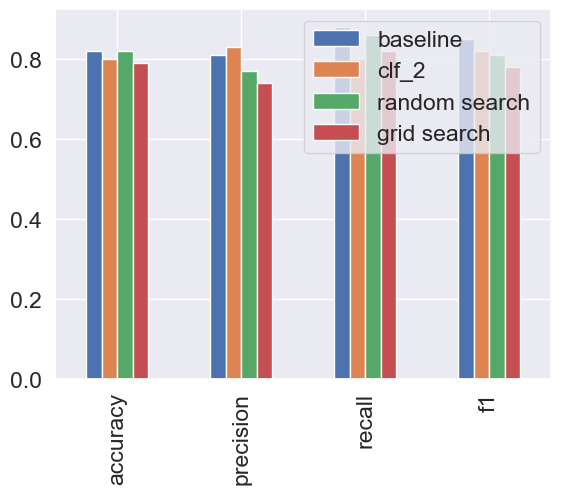

In [313]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                               'clf_2': clf_2_metrics,
                               'random search': rs_metrics,
                               'grid search': gs_metrics})

compare_metrics.plot.bar()

There is a slight error in the above comparison as our baseline and clf_2 metrics are based off of a validation split. 
So to comapre them with the random search and grid search we must train the two models with the same train test split with random seed
of 42.

In [315]:
# Lets do base line model first:
np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf_baseline = RandomForestClassifier()
clf_baseline.fit(X_train, y_train)

y_preds = clf_baseline.predict(X_test)

baseline_metrics = evaluate_preds(y_test, y_preds)

Acc: 85.25 %
Precision: 84.85 %
recall: 87.50 %
f1 score: 86.15 %


In [319]:
#Lets do some clf_2 
np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(X_train, y_train)

y_preds = clf_2.predict(X_test)

clf_2 = evaluate_preds(y_test, y_preds)

Acc: 86.89 %
Precision: 85.29 %
recall: 90.62 %
f1 score: 87.88 %


<Axes: >

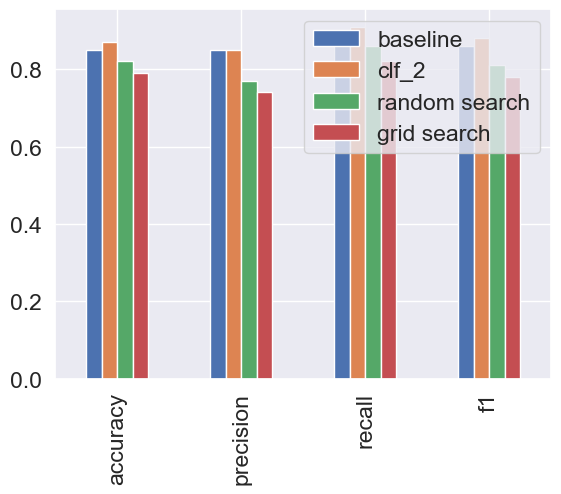

In [320]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                               'clf_2': clf_2,
                               'random search': rs_metrics,
                               'grid search': gs_metrics})

compare_metrics.plot.bar()

## 6. Saving and loading trained machine learning models.
Two ways to save and load a ML model.

    1. With the python's pickle module
    2. With the python's joblib module

**Pickle**

In [329]:
import pickle

#Save an existing model to file.
pickle.dump(gs_clf, open('gs_random_forest_classifier1.pkl', 'wb'))

In [330]:
# Load a saved model
loaded_pickle_model = pickle.load(open('gs_random_forest_classifier1.pkl', 'rb'))

In [331]:
#Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)

evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69 %
Precision: 74.19 %
recall: 82.14 %
f1 score: 77.97 %


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**JobLib**

In [332]:
from joblib import dump, load

#Save model to file
dump(gs_clf, filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [333]:
# Import a saved joblib saved model
loaded_job_model = load(filename='gs_random_forest_model_1.joblib')

In [334]:
# MAke and evaluated joblib predcitions
joblib_y_preds = loaded_job_model.predict(X_test)

evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69 %
Precision: 74.19 %
recall: 82.14 %
f1 score: 77.97 %


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

In [335]:
## 7.Putting it all together
data = pd.read_csv('data/car-sales-extended-missing-data.csv')

In [336]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [337]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [338]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Its very imp to remember that ml models to work we should have no missing data and all vars should be numerical.

Steps we to want to do: -> in scikit learn pipeline
1. Fill missing data.
2. convert data to numbers
3. build a model on the data.

In [347]:
# Getting the data ready.
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#Set up random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels.
data = pd.read_csv('data/car-sales-extended-missing-data.csv')
data.dropna(subset = ['Price'], inplace = True)

# Define different features and transform Pipeline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[(
    'imputer', SimpleImputer(strategy = 'constant', fill_value='missing')), 
    ('onehot', OneHotEncoder(handle_unknown= 'ignore'))])

door_feature = ['Doors']
door_transformer = Pipeline(steps = [(
    'imputer', SimpleImputer(strategy='constant', fill_value=4))])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy= 'mean'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers )
preprocessor = ColumnTransformer(transformers= [
                                    ('cat', categorical_transformer, categorical_features), 
                                    ('door', door_transformer, door_feature),   
                                    ('num', numeric_transformer, num_features)])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps = [('preprocessor', preprocessor), 
                          ('model', RandomForestRegressor())])

# Split the data
X = data.drop('Price', axis = 1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model.fit(X_train, y_train)
model.predict(X_test)
model.score(X_test, y_test)
             
               

0.22188417408787875

Its also possible to use `GridSearchCV` or `RandomSearchCV` with our pipleline.

In [345]:
# USe GridSearchCV with our regression pipeline
pipe_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'model__n_estimators': [100, 1000],
    'model__max_depth': [None, 5],
    'model__max_features': [None,'sqrt'],
    'model__min_samples_split':[2,4]
}
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose = 2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=None, model__min_samp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': [None, 'sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [346]:
gs_model.score(X_test, y_test)

0.2886531011595892